# 1.뉴스 데이터를 통한 LDA 분석 (gensim)
- 사이킷런에서는 Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스그룹 데이터를 제공

## 1.필요 모듈 로드

In [28]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [29]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
import gensim

## 2.데이터 로드

In [30]:
# 컴퓨터 그래픽 및 기술 주제와 우주 과학 카테고리 선택
categories = ['comp.graphics', 'sci.med']

dataset = fetch_20newsgroups(shuffle=True, categories=categories, random_state=42, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('샘플의 수 :',len(documents))

샘플의 수 : 1178


In [31]:
documents[1]

'ML> From: libman@hsc.usc.edu (Marlena Libman)\nML> I need advice with a situation which occurred between me and a physican\nML> which upset me.\n\nML> My questions: (1) Should I continue to have this doctor manage my care?\n\nThat\'s easy:  No.  You wouldn\'t take your computer into a repair\nshop where they were rude to you, even if they were competent in\ntheir business.  Why would you take your own body into a "repair\nshop" where the "repairman" has such a bad attitude?'

In [32]:
print(dataset.target_names)

['comp.graphics', 'sci.med']


## 3.데이터 전처리
  1. 대문자->소문자
  2. 구두점, 숫자, 특수 문자 제거
  3. 짧은 단어 제거

- [^a-zA-Z] : 영문자를 제외한 모든 문자
- regrex=True : 함수에서 이 패턴을 정규 표현식으로 처리
- ' '.join([w for w in x.split() if len(w)>3]) : 데이터를 순회하면서 공백으로 단어를 나누고 길이가 3이상인 단어들을 리스트로 반환하고 join 함수를 통해서 한 줄의 텍스트로 병합

In [33]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] =  news_df['document'].str.replace("[^a-zA-Z]", " ", regex=True)

# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x : ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x : x.lower())

In [34]:
news_df['clean_doc'][1]

'from libman marlena libman need advice with situation which occurred between physican which upset questions should continue have this doctor manage care that easy wouldn take your computer into repair shop where they were rude even they were competent their business would take your body into repair shop where repairman such attitude'

- 불용어 제거

In [35]:
# NLTK로부터 불용어를 받아온다.
nltk.download("stopwords")
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x :x.split())
tokenized_doc = tokenized_doc.apply(lambda x : [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
print(tokenized_doc[1])

['libman', 'marlena', 'libman', 'need', 'advice', 'situation', 'occurred', 'physican', 'upset', 'questions', 'continue', 'doctor', 'manage', 'care', 'easy', 'take', 'computer', 'repair', 'shop', 'rude', 'even', 'competent', 'business', 'would', 'take', 'body', 'repair', 'shop', 'repairman', 'attitude']


## 4.TF-IDF 벡터화 / 단어 집합 생성

In [37]:
tokenized_doc[:5]

,clean_doc
0,"[depends, kind, polygons, convex, simple, conc..."
1,"[libman, marlena, libman, need, advice, situat..."
2,"[posted, mpeg, decoder, player, binaries, pict..."
3,"[must, risking, something, risk, high, exercis..."
4,"[complex, medical, images, available, anywhere..."


- 단어를 (word_id, word_frequency)의 형태로 변경
- corpora.Dictionary

In [38]:
# Gensim의 사전 객체 생성
dictionary = corpora.Dictionary(tokenized_doc)

# 빈도가 너무 높거나 낮은 단어 제거
# - no_above=0.3: 전체 문서의 30% 이상 등장하는 단어 제거
dictionary.filter_extremes(no_above=0.3)

print(dict(dictionary))

{0: 'according', 1: 'avoid', 2: 'cases', 3: 'cause', 4: 'convex', 5: 'deal', 6: 'depends', 7: 'edges', 8: 'example', 9: 'experience', 10: 'headache', 11: 'inside', 12: 'kind', 13: 'lines', 14: 'loop', 15: 'polygons', 16: 'simple', 17: 'special', 18: 'stuff', 19: 'test', 20: 'trouble', 21: 'advice', 22: 'attitude', 23: 'body', 24: 'business', 25: 'care', 26: 'computer', 27: 'continue', 28: 'doctor', 29: 'easy', 30: 'even', 31: 'need', 32: 'occurred', 33: 'questions', 34: 'situation', 35: 'take', 36: 'upset', 37: 'would', 38: 'able', 39: 'algorithm', 40: 'algorithms', 41: 'another', 42: 'areas', 43: 'arithmetic', 44: 'based', 45: 'berkeley', 46: 'better', 47: 'binaries', 48: 'brown', 49: 'case', 50: 'changes', 51: 'claim', 52: 'code', 53: 'color', 54: 'colors', 55: 'common', 56: 'components', 57: 'constant', 58: 'dark', 59: 'data', 60: 'default', 61: 'description', 62: 'difference', 63: 'direct', 64: 'display', 65: 'distance', 66: 'distributed', 67: 'dithering', 68: 'documentation', 69: 

In [39]:
# 각 문서를 BOW로 벡터화 (id,빈도)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 2)]


In [40]:
tokenized_doc.iloc[0]

['depends',
 'kind',
 'polygons',
 'convex',
 'simple',
 'concave',
 'trouble',
 'concave',
 'loop',
 'inside',
 'trouble',
 'cause',
 'test',
 'avoid',
 'checking',
 'edges',
 'according',
 'experience',
 'simple',
 'headache',
 'stuff',
 'deal',
 'special',
 'cases',
 'example',
 'overlapped',
 'lines']

In [41]:
# TF-IDF 모델 생성 및 적용
tfidf_model = gensim.models.TfidfModel(corpus)
corpus_tfidf= tfidf_model[corpus]

In [42]:
# 첫 번째 문서의 TF-IDF 값 출력
for doc in corpus_tfidf:
    print(doc)
    break  # 첫 번째 문서만 출력 (전체 문서를 출력하려면 break 제거)


[(0, 0.22161679516806426), (1, 0.18696084456653053), (2, 0.17874602585424512), (3, 0.1390500451246927), (4, 0.256272745769598), (5, 0.18696084456653053), (6, 0.23367440798452088), (7, 0.22161679516806426), (8, 0.15601014199048038), (9, 0.16214000897577605), (10, 0.21816729178239344), (11, 0.20634833320460202), (12, 0.14721596606479695), (13, 0.17439563380577994), (14, 0.2730956739126692), (15, 0.22932401593605573), (16, 0.32212948482765746), (17, 0.17874602585424512), (18, 0.16214000897577605), (19, 0.16323890965211763), (20, 0.38933613066904393)]


In [43]:
for idx, value in doc:
    print(f"단어: {dictionary[idx]}, TF-IDF 값: {value}")

단어: according, TF-IDF 값: 0.22161679516806426
단어: avoid, TF-IDF 값: 0.18696084456653053
단어: cases, TF-IDF 값: 0.17874602585424512
단어: cause, TF-IDF 값: 0.1390500451246927
단어: convex, TF-IDF 값: 0.256272745769598
단어: deal, TF-IDF 값: 0.18696084456653053
단어: depends, TF-IDF 값: 0.23367440798452088
단어: edges, TF-IDF 값: 0.22161679516806426
단어: example, TF-IDF 값: 0.15601014199048038
단어: experience, TF-IDF 값: 0.16214000897577605
단어: headache, TF-IDF 값: 0.21816729178239344
단어: inside, TF-IDF 값: 0.20634833320460202
단어: kind, TF-IDF 값: 0.14721596606479695
단어: lines, TF-IDF 값: 0.17439563380577994
단어: loop, TF-IDF 값: 0.2730956739126692
단어: polygons, TF-IDF 값: 0.22932401593605573
단어: simple, TF-IDF 값: 0.32212948482765746
단어: special, TF-IDF 값: 0.17874602585424512
단어: stuff, TF-IDF 값: 0.16214000897577605
단어: test, TF-IDF 값: 0.16323890965211763
단어: trouble, TF-IDF 값: 0.38933613066904393


## 5.LDA 모델 학습

- corpus_tfidf
  - LDA 모델에 입력되는 문서 코퍼스. 이 코퍼스는 TF-IDF 값으로 변환된 문서들의 리스트이며, 각 문서는 (단어 인덱스, TF-IDF 값)의 튜플로 이루어져 있음. 즉, Bag of Words (BOW)가 아닌 TF-IDF 기반으로 벡터화된 문서들이 LDA 모델에 입력됨.

- num_topics=NUM_TOPICS
  - LDA 모델이 추출할 토픽의 개수를 설정하는 파라미터. 예를 들어, 20개의 토픽을 추출하려면 NUM_TOPICS=20으로 설정하면 됨.


- id2word=dictionary
  - 단어 ID와 실제 단어 사이의 매핑을 정의한 사전. 이 사전은 Gensim의 corpora.Dictionary 객체로, 각 단어에 대해 고유한 인덱스를 부여하고 이를 토픽 모델링에서 참조.
  - LDA 모델은 BOW 또는 TF-IDF와 같은 방식으로 단어 인덱스를 다루기 때문에, 이를 사람이 읽을 수 있는 실제 단어로 변환할 때 id2word가 필요.

- passes=15
  - 모델이 전체 코퍼스를 몇 번 반복하여 학습할 것인지를 정의하는 인자입니다. 여기서는 15번 반복 학습을 수행. 이 값이 높을수록 모델이 데이터에 더 많이 적응하게 되지만, 지나치게 높은 값은 오버피팅의 위험을 초래할 수 있음.
  - passes 값은 모델의 수렴 속도나 정확도에 영향을 미칩니다

        - ldamodel_tfidf = gensim.models.ldamodel.LdaModel(
            corpus_tfidf,                 # 입력 데이터 (TF-IDF 기반 코퍼스)
            num_topics=NUM_TOPICS,        # 토픽 개수
            id2word=dictionary,           # 단어 사전
            passes=15,                    # 전체 데이터셋 반복 횟수
            iterations=400,               # 각 문서에서 반복하는 샘플링 횟수
            alpha='auto',                 # Alpha 하이퍼파라미터 (symmetric, asymmetric, auto)
            eta='auto',                   # Beta (Eta) 하이퍼파라미터 (symmetric 또는 auto)
            random_state=42,              # 난수 시드 (재현성 확보)
            chunksize=2000,               # 한 번에 처리할 문서 수
            update_every=1,               # 모델을 얼마나 자주 업데이트할지 (1: 각 문서마다 업데이트)
            minimum_probability=0.01,     # 출력할 주제의 최소 확률
            per_word_topics=True          # 각 단어에 대해 주제를 할당할지 여부
        )

In [44]:
# LDA 모델 적용 (TF-IDF 기반)
NUM_TOPICS = 5
ldamodel_tfidf = gensim.models.ldamodel.LdaModel(corpus_tfidf,
                                num_topics = NUM_TOPICS,
                                id2word=dictionary,
                                random_state=42,
                                passes=15
                                )

# 토픽 출력 개수 확인하는 매서드
topics_tfidf = ldamodel_tfidf.print_topics(num_words=5)

In [27]:
# 토픽 출력
for topic in topics_tfidf:
    print(topic)

(0, '0.005*"graphics" + 0.004*"image" + 0.004*"thanks" + 0.004*"files" + 0.004*"would"')
(1, '0.002*"know" + 0.002*"information" + 0.002*"health" + 0.002*"care" + 0.002*"good"')
(2, '0.008*"banks" + 0.008*"gordon" + 0.008*"pitt" + 0.008*"cadre" + 0.008*"shameful"')
(3, '0.003*"food" + 0.003*"disease" + 0.003*"people" + 0.003*"cause" + 0.003*"medical"')
(4, '0.002*"happen" + 0.002*"article" + 0.002*"stones" + 0.002*"sure" + 0.002*"kidney"')


- print_topics():
  - 여러 토픽을 한 번에 출력하고, 각 토픽을 문자열 형식으로 제공.
  - 주로 전체 토픽 요약을 보고 싶을 때 유용.
- show_topic(t, num_words):
  - 특정 토픽에 대해 단어와 가중치를 리스트 형태로 반환.
  - 주로 특정 토픽의 세부 정보를 얻고, 그 데이터를 직접 활용할 때 유용.

In [45]:
# print_topics()
ldamodel_tfidf.print_topics(num_words=2)

[(0, '0.005*"graphics" + 0.004*"image"'),
 (1, '0.002*"know" + 0.002*"information"'),
 (2, '0.008*"banks" + 0.008*"gordon"'),
 (3, '0.003*"food" + 0.003*"disease"'),
 (4, '0.002*"happen" + 0.002*"article"')]

In [47]:
# show_topics()
topic_number = 0
topic_topn = 4
ldamodel_tfidf.show_topic(topic_number, topn=topic_topn)

[('graphics', 0.0048374855),
 ('image', 0.0040654363),
 ('thanks', 0.003953508),
 ('files', 0.0039207935)]

## 6.시각화

### 1.pyLDAvis

In [48]:
!pip install pyLDAvis
# !pip install pyLDAvis --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.6 MB/s eta 0:00:00


- import pyLDAvis.gensim_models
  - PyLDAvis는 Gensim 모델과 쉽게 통합할 수 있도록 gensim_models 모듈을 제공. 이를 통해 Gensim에서 학습한 LDA 모델의 결과를 시각화할 수 있음.

- pyLDAvis.enable_notebook():
  - Jupyter Notebook 환경에서 PyLDAvis의 시각화가 제대로 동작하도록 해주는 설정. 이 코드는 노트북 내부에서 그래프가 렌더링되도록 활성화.

- vis_tfidf = pyLDAvis.gensim_models.prepare(ldamodel_tfidf, corpus_tfidf, dictionary):
  - **pyLDAvis.gensim_models.prepare**는 Gensim의 LDA 모델을 PyLDAvis 시각화를 위한 형식으로 준비하는 함수.
  - 이 함수는 다음과 같은 매개변수를 사용합니다:
        - ldamodel_tfidf: 학습된 LDA 모델입니다.
        - corpus_tfidf: TF-IDF로 변환된 문서 코퍼스입니다.
        - dictionary: 단어와 인덱스를 매핑하는 사전입니다.

- pyLDAvis.display(vis_tfidf):
  준비된 시각화 결과를 Jupyter Notebook에서 출력. 출력 결과는 각 토픽의 상관관계와 토픽을 구성하는 중요한 단어들을 시각적으로 확인할 수 있는 인터페이스.
- λ = 1일 때:
  - 순수하게 단어의 빈도를 기반으로 가장 중요한 단어들이 선택. 즉, 해당 단어가 전체 데이터셋에서 많이 등장하는 정도를 기준으로 중요한 단어를 결정.
  - 예를 들어, "the", "and", "is"와 같은 단어는 전체적으로 많이 등장하기 때문에 높은 순위에 나올 수 있음. 이 때문에 불용어를 완전히 제거하지 않은 경우, 자주 등장하는 일반적인 단어가 더 중요한 것으로 보일 수 있음.
- λ = 0일 때:
  - 토픽 내에서 특이하게 많이 등장하는 단어들에 가중치를 두어 관련성을 평가. 즉, 특정 토픽에 특화된 단어들만 더 중요하게 고려됨. 이때는 특정 주제와 밀접한 단어들이 상위에 노출될 가능성이 큼.
- Overall term frequency (전체 단어 빈도)
  - 파란색 막대는 전체 문서에서 해당 단어가 나타난 전체 빈도를 나타냄.
  - 즉, 특정 단어가 전체 코퍼스에서 얼마나 자주 등장하는지를 보여줌.
- Estimated term frequency within the selected topic (선택한 토픽 내에서 추정된 단어 빈도)
  - 빨간색 막대는 선택한 토픽 내에서 그 단어가 차지하는 비율을 나타냄.
  - 즉, 특정 단어가 현재 선택된 토픽에서 얼마나 중요한지를 나타내는 빈도.
- Saliency
  - Saliency는 단어의 중요도를 나타내는 지표.
  - 해당 단어가 여러 토픽에서 중요하게 등장하는 단어일수록 Saliency 값이 높음.
  - 값이 높을수록 상위에 나타나는 경향이 있음.
- Relevance (관련성)
  - Relevance는 단어가 특정 토픽에 얼마나 관련이 있는지를 나타내는 지표.
  - 람다로 조정하여 볼 수 있음

In [49]:
import pyLDAvis.gensim_models

# LDA 시각화
pyLDAvis.enable_notebook()
vis_tfidf = pyLDAvis.gensim_models.prepare(ldamodel_tfidf, corpus_tfidf, dictionary)
pyLDAvis.display(vis_tfidf)

### 2.WordCloud

In [50]:
pip install wordcloud

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
from wordcloud import WordCloud
from PIL import Image, ImageOps
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


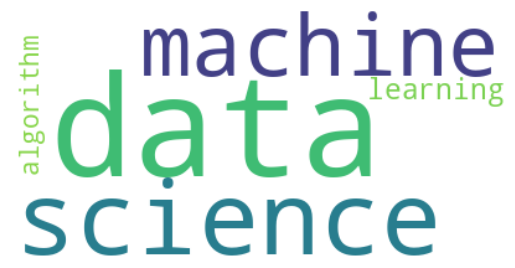

In [52]:
# 예시로 0번 토픽의 상위 5개 단어와 가중치가 다음과 같다고 가정
topic_0 = [('data', 0.02), ('science', 0.015), ('machine', 0.012), ('learning', 0.010), ('algorithm', 0.008)]

# dict로 변환하여 워드 클라우드 생성
wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(topic_0))

# 시각화
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


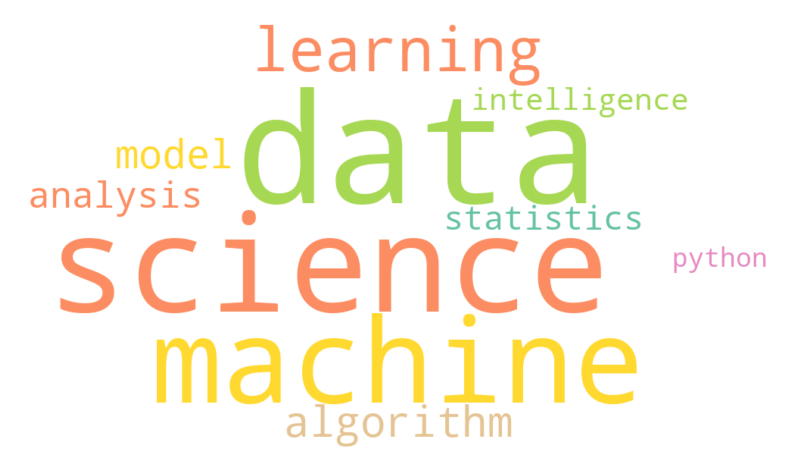

In [54]:
# 예시로 0번 토픽의 상위 10개 단어와 가중치
topic_0 = [
    ('data', 0.02), ('science', 0.015), ('machine', 0.012),
    ('learning', 0.010), ('algorithm', 0.008), ('model', 0.007),
    ('analysis', 0.006), ('statistics', 0.005), ('intelligence', 0.004),
    ('python', 0.003)
]

# 이미지 불러오고 처리 (배경은 흰색, 글자 모양은 검정색으로 설정)
mask_image = np.array(Image.open('wordcloud_image.png'))

# topic_0 데이터를 이용하여 워드 클라우드 생성
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=42,
    background_color="white",  # 배경을 흰색으로 설정
    colormap="Set2",
    collocations=False,
    stopwords=STOPWORDS,
    mask=mask_image         # 이미지를 넣으면 이미지 있는 부분에만 워드클라우드가 표현되게 해줌
).generate_from_frequencies(dict(topic_0))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


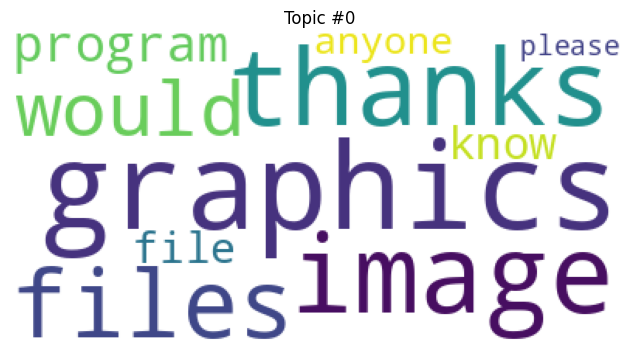

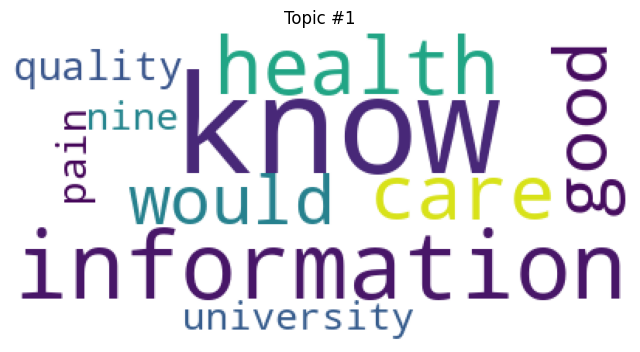

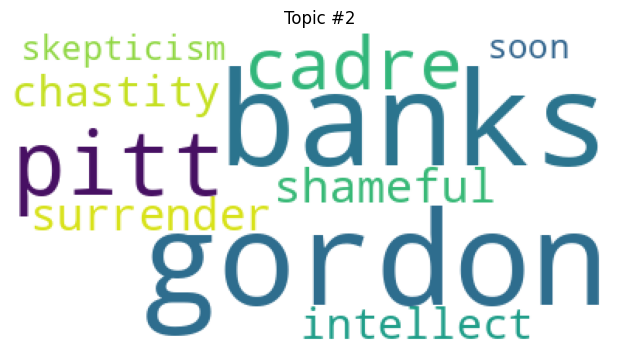

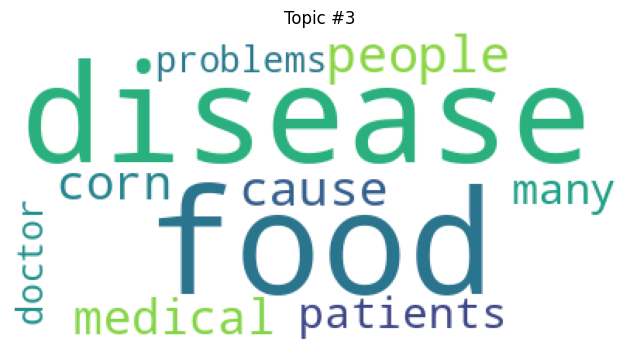

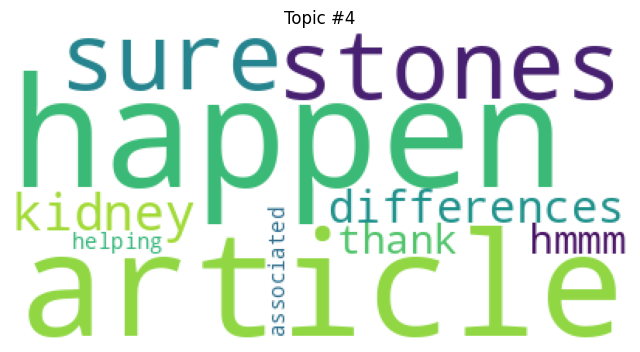

In [55]:
# 토픽별 워드 클라우드 생성 함수
def plot_wordcloud(lda_model, num_topics, num_words=10):
    for t in range(num_topics):
        plt.figure(figsize=(8, 8))
        plt.imshow(WordCloud(background_color='white').generate_from_frequencies(
            dict(lda_model.show_topic(t, num_words))))
        plt.axis("off")
        plt.title(f"Topic #{t}")
        plt.show()

# 워드 클라우드 그리기 (토픽별)
plot_wordcloud(ldamodel_tfidf, NUM_TOPICS, num_words=10)

In [56]:
from collections import defaultdict
# 전체 토픽에서 단어 가중치 합산하기
word_weights = defaultdict(float)

for topic_id in range(NUM_TOPICS):
    topic = ldamodel_tfidf.show_topic(topic_id, topn=100)  # 각 토픽에서 상위 100개의 단어 추출
    for word, weight in topic:
        word_weights[word] += weight  # 단어의 가중치를 누적

# 전체 토픽 기반 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(word_weights)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
word_weights

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


defaultdict(float,
            {'graphics': 0.006246223929338157,
             'image': 0.004065436311066151,
             'thanks': 0.007337635266594589,
             'files': 0.003920793533325195,
             'would': 0.011030718917027116,
             'program': 0.0034126020036637783,
             'know': 0.010819838498719037,
             'file': 0.004584915703162551,
             'anyone': 0.008289698977023363,
             'please': 0.004503317992202938,
             'need': 0.0030708066187798977,
             'like': 0.00774310203269124,
             'help': 0.004229976213537157,
             'looking': 0.0029431129805743694,
             'format': 0.0029341455083340406,
             'color': 0.0027477401308715343,
             'windows': 0.0027146025095134974,
             'code': 0.0027113233227282763,
             'using': 0.0026362696662545204,
             'software': 0.002560363383963704,
             'advance': 0.002392418682575226,
             'find': 0.005193521967157

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


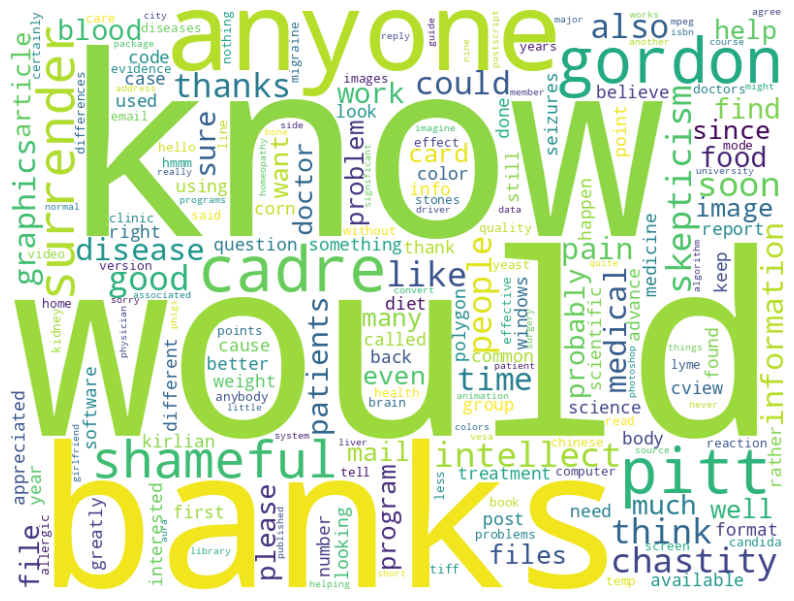

In [58]:
# 워드 클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 7.문서 별 토픽 분포 확인

In [59]:
# 문서별 bow
corpus[1]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 2),
 (36, 1),
 (37, 1)]

- lda모델에 전체 데이터가 정수 인코딩 된 결과를 넣으면 각 문서별 토픽의 비율을 알 수 있음

In [60]:
ldamodel_tfidf[corpus][0]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.9661027)]

- 0번 문서는 4번 토픽, 15번 토픽, 1번 토픽 순서대로 높은 비율을 가짐

In [61]:
for i, topic_list in enumerate(ldamodel_tfidf[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',sorted(topic_list, key=lambda x:x[1], reverse=True))

0 번째 문서의 topic 비율은 [(0, 0.96610105)]
1 번째 문서의 topic 비율은 [(1, 0.81098706), (0, 0.15663639), (3, 0.010990495), (2, 0.010717301), (4, 0.010668753)]
2 번째 문서의 topic 비율은 [(0, 0.8804492), (3, 0.11596876)]
3 번째 문서의 topic 비율은 [(0, 0.9258439), (2, 0.018650927), (3, 0.0186264), (4, 0.018471314), (1, 0.018407408)]
4 번째 문서의 topic 비율은 [(3, 0.8756107), (0, 0.08096527), (1, 0.014557677), (2, 0.014441273), (4, 0.014425058)]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2.뉴스 기사 제목 데이터 (sklearn) - 다운됨 실행 하지 말기

- [데이터 링크](https://www.kaggle.com/therohk/million-headlines)

## 1.데이터 로드

In [ ]:
pip install pyLDAvis==3.2.2 # 사이킷런에서는 버전을 낮춰야함

In [ ]:
import pandas as pd
import urllib.request
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/19.%20Topic%20Modeling%20(LDA%2C%20BERT-Based)/dataset/abcnews-date-text.csv",
                           "abcnews-date-text.csv")

data = pd.read_csv('abcnews-date-text.csv', on_bad_lines='skip')
print('뉴스 제목 개수 :',len(data))

In [ ]:
print(data.head(5))

- 뉴스 기사 제목만 필요하기 때문에 따로 저장

In [ ]:
text = data[['headline_text']]
text.head(5)

## 2.데이터 전처리

1. 토큰화
  - axis=1 : 행 단위 적용, 'headline_text'열에 각 행 데이터를 처리

In [ ]:
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)
display("df",df)
# 각 열(column)에 대해 합계를 계산
result = df.apply(sum, axis=0)
display("axis=0", result)

# 각 행(row)에 대해 합계를 계산
result = df.apply(sum, axis=1)
display("axis=1", result)


In [ ]:
nltk.download('punkt_tab')
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

In [ ]:
print(text.head(5))

2. 표제어 추출
  - WordNetLemmatizer : 표제어 추출 도구로 단어의 기본형을 찾음
  - pos='v' : 해당 단어가 동사(verb)로 간주되어야 함을 의미
  - ["running", "jumps", "eats"] -> `["run", "jump", "eat"]`로 변환


In [ ]:
nltk.download('wordnet')
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
print(text.head(5))


3. 길이가 3이하인 단어 제거

In [ ]:
tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 3])
print(tokenized_doc[:5])

## 3.TF-IDF 벡터화

In [ ]:
# 역토큰화 (토큰화 작업을 되돌림)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

# 다시 text['headline_text']에 재저장
text['headline_text'] = detokenized_doc

In [ ]:
text['headline_text'][:5]

In [ ]:
# 상위 1,000개의 단어를 보존
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000)
X = vectorizer.fit_transform(text['headline_text'])

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)


In [ ]:
print(X[0])

## 4.토픽 모델링

- n_components=10:
  - 추출할 토픽의 수를 지정. 여기서는 10개의 주제를 추출하도록 설정되어 있음.

- learning_method='online'
  - LDA의 학습 방법을 설정하는 옵션입니다. Scikit-learn에서는 batch와 online 두 가지 학습 방법을 지원.
    - online: 확률적 그라디언트 디센트를 사용한 점진적 학습을 수행. 대규모 데이터셋을 처리할 때 메모리 효율이 좋음.
    - batch: 전체 데이터를 한꺼번에 사용하여 LDA를 학습.

- random_state=42
  - 난수 시드를 고정하는 설정. LDA는 확률적 모델이기 때문에 학습할 때마다 결과가 달라질 수 있음. 난수 시드를 고정하여 실험을 재현 가능하게 함.

- max_iter=1
  - 최대 반복 횟수. LDA 모델이 수렴할 때까지 데이터셋을 몇 번 반복하여 학습할지를 결정.
  - 값이 클수록 더 많은 반복을 통해 더 정교한 모델을 얻을 수 있지만, 시간이 더 많이 소요됨. 기본값은 10.

In [ ]:
# 모델 정의
lda_model = LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1)

# 모델 학습
lda_top = lda_model.fit_transform(X)

In [ ]:
lda_top.shape

In [ ]:
lda_top[0]

- shape : 토픽의 수 x 단어의 수

In [ ]:
print(lda_model.components_)
print(lda_model.components_.shape)

In [ ]:
# 단어 집합. 1,000개의 단어가 저장됨.
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms)


## 5.시각화

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
import numpy as np

# TF-IDF 벡터화된 단어 목록을 추출
feature_names = vectorizer.get_feature_names_out()

# 각 문서의 길이를 올바르게 계산 (TF-IDF 값들의 합으로 계산)
doc_lengths = np.asarray(X.sum(axis=1)).flatten()

# 전체 단어 빈도를 올바르게 계산 (TF-IDF 행렬을 통해 계산)
term_frequency = np.asarray(X.sum(axis=0)).flatten()

# LDA 시각화
pyLDAvis.enable_notebook()

# pyLDAvis에 맞게 데이터 준비
vis_data = pyLDAvis.prepare(
    topic_term_dists=lda_model.components_,  # LDA 모델의 각 토픽에 대한 단어 분포
    doc_topic_dists=lda_top,                 # 문서별 토픽 분포
    doc_lengths=doc_lengths,                 # 각 문서의 길이
    vocab=feature_names,                     # 단어 목록
    term_frequency=term_frequency            # 전체 단어 빈도
)

# 시각화
pyLDAvis.display(vis_data)
